In [17]:
import os
from utils import *

In [18]:
# Map from velocities to list of jobs, assumed run by cheetahpretrain.sh

velocities = {
    -2.0: [532990], 
    -1.9: [536093, 541360],
    -1.5: [536092, 541361],
    -1.1: [541362],
    -1.0: [532991, ], 
    -0.9: [536094, 541363],
    -0.1: [532992], 
    -0.5: [536091, 541364],
     0.1: [532889, 541365], 
     0.5: [532969, 541366], 
     0.9: [536095, 541367],
     1.1: [536096, 541368],
     1.5: [532970, 541369], 
     1.9: [532971, 541370], 
     2.0: [532975],
}

num_jobs = sum([len(velocities[vel]) for vel in velocities])
print(f"We have {len(velocities)} velocities, and {num_jobs} jobs.")
print(f"That is an average of {num_jobs/len(velocities)} jobs per velocity.")

We have 15 velocities, and 25 jobs.
That is an average of 1.6666666666666667 jobs per velocity.


In [19]:
remotepaths ={vel: {job: f"/tiger/u/lando/cpre/{job}/log.json" for job in jobs} for (vel, jobs) in velocities.items()}
localpaths ={vel: {job: f"/tmp/log{job}.json" for job in jobs} for (vel, jobs) in velocities.items()}

In [20]:
for vel in velocities:
    for job in velocities[vel]:
        remote = remotepaths[vel][job]
        local = localpaths[vel][job]
        command = f"scp lando@sc.stanford.edu:{remote} {local}"
        rcode = os.system(command)
        if rcode != 0:
            print(command)
            raise Exception("Bad Status code")
        print(f"Velocity = {vel}, Loaded Job {job}")

scp lando@sc.stanford.edu:/tiger/u/lando/cpre/532990/log.json /tmp/log532990.json


Exception: Bad Status code

In [21]:
lines = {vel: {job: read_log(localpaths[vel][job]) for job in jobs} for (vel, jobs) in velocities.items()}

In [26]:
x = [1,2,3]
y = [4,5,6]
z = np.vstack([x,y])
np.mean(z, axis=0)

array([2.5, 3.5, 4.5])

In [27]:
warms = {vel: {} for vel in velocities}
slbos = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        warm, slbo = extract_rewards(lines[vel][job])
        warms[vel][job] = warm
        slbos[vel][job] = slbo
        print(f"Velocity {vel}, Job {job} has started {len(slbos[vel][job][0])} stages")

Velocity -2.0, Job 532990 has started 100 stages
Velocity -1.9, Job 536093 has started 100 stages
Velocity -1.9, Job 541360 has started 100 stages
Velocity -1.5, Job 536092 has started 100 stages
Velocity -1.5, Job 541361 has started 100 stages
Velocity -1.1, Job 541362 has started 100 stages
Velocity -1.0, Job 532991 has started 100 stages
Velocity -0.9, Job 536094 has started 100 stages
Velocity -0.9, Job 541363 has started 100 stages
Velocity -0.1, Job 532992 has started 100 stages
Velocity -0.5, Job 536091 has started 100 stages
Velocity -0.5, Job 541364 has started 100 stages
Velocity 0.1, Job 532889 has started 100 stages
Velocity 0.1, Job 541365 has started 100 stages
Velocity 0.5, Job 532969 has started 100 stages
Velocity 0.5, Job 541366 has started 100 stages
Velocity 0.9, Job 536095 has started 100 stages
Velocity 0.9, Job 541367 has started 100 stages
Velocity 1.1, Job 536096 has started 100 stages
Velocity 1.1, Job 541368 has started 100 stages
Velocity 1.5, Job 532970 has

In [28]:
real_rewards = {vel: {} for vel in velocities}
virt_rewards = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        real, virt = get_checkpoints(lines[vel][job])
        real_rewards[vel][job] = real
        virt_rewards[vel][job] = virt

In [29]:
warms_mean = {}
warms_std = {}
for vel in velocities:
    warm = [np.asarray(warms[vel][job]) for job in warms[vel]]
    min_length = min([len(w) for w in warms])
    shortwarm = [w[:min_length] for w in warm]
    warm = np.vstack(warm)
    assert warm.shape == (len(velocities[vel]), min_length)
    warmmean = np.mean(axis=1)
    warmstd = np.std(axis=1)
    warms_mean[vel] = warmmean
    warms_std[vel] = warms_std

TypeError: object of type 'float' has no len()

{-2.0: -90.60565689208266, -1.9: -70.67690735370886, -1.5: -42.06956291427862, -1.1: -36.99489419364075, -1.0: -23.743657058369845, -0.9: -21.157800214277188, -0.1: -3.1041742201174394, -0.5: -10.680755730823584, 0.1: -3.4021209446496337, 0.5: -12.323942266246538, 0.9: -23.53198112703673, 1.1: -31.343789461165542, 1.5: -51.21932985927324, 1.9: -63.050301977318384, 2.0: -85.4236675900036}


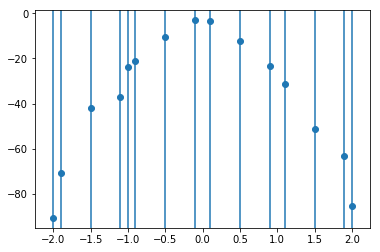

In [30]:
vellist = velocities.keys()
max_rewards = {vel: np.mean(np.asarray([max(real_rewards[vel][job]) for job in real_rewards[vel]])) for vel in real_rewards}
for vel in vellist:
    plt.axvline(x = vel)
plt.scatter(vellist, [max_rewards[vel] for vel in vellist])
print(max_rewards)

{-2.0: -993.9190119522864, -1.9: -945.0818382085795, -1.5: -745.0818382085795, -1.1: -546.2446644648728, -1.0: -510.61478664909976, -0.9: -445.43216946165614, -0.1: -187.5039532110764, -0.5: -259.65397607613966, 0.1: -231.2243621688237, 0.5: -410.1003669467948, 0.9: -609.6475634930734, 1.1: -709.6475634930736, 1.5: -909.6475634930736, 1.9: -1109.6475634930734, 2.0: -1160.8872788980732}


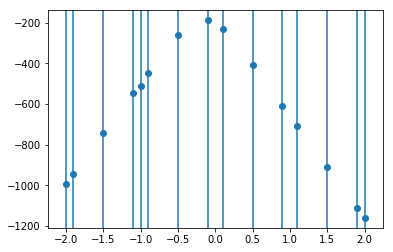

In [31]:
min_rewards = {vel: np.mean(np.asarray([min(real_rewards[vel][job]) for job in real_rewards[vel]])) for vel in real_rewards}
for vel in vellist:
    plt.axvline(x = vel)
plt.scatter(vellist, [min_rewards[vel] for vel in vellist])
print(min_rewards)

{-2.0: -136.4502250988098, -1.9: -101.15423269038038, -1.5: -73.20949096123613, -1.1: -61.13370977385761, -1.0: -47.087996715423955, -0.9: -35.88038558730979, -0.1: -8.75671650336899, -0.5: -18.677280704086265, 0.1: -9.545282672321349, 0.5: -23.09364493886916, 0.9: -40.610557419984794, 1.1: -50.763872744894364, 1.5: -81.94783046596359, 1.9: -105.55608759237818, 2.0: -137.50432902203622}


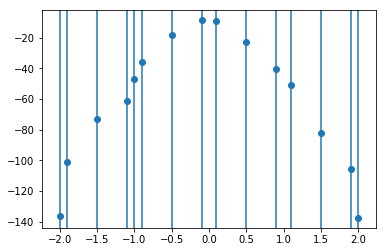

In [32]:
avg_rewards = {vel: np.mean(np.asarray([np.mean(np.asarray(real_rewards[vel][job][:-30])) for job in velocities[vel]])) for vel in vellist}
for vel in vellist:
    plt.axvline(x = vel)
plt.scatter(vellist, [avg_rewards[vel] for vel in vellist])
print(avg_rewards)

In [ ]:
for vel in real_rewards:
    fig, ax = plt.subplots()
    ax.axhline(y=avg_rewards[vel], color="green")
    ax.plot(real_rewards[vel], label=f"vel={vel}")
    ax.legend()

In [ ]:
converged = []
iters = {}
for vel in velocities:
    max_r = dict(max_rewards)[vel]
    for (i, r) in enumerate(real_rewards[vel]):
        if abs(r - max_r)/abs(max_r) < 0.01:
            iters[vel] = i
            break
print(iters)
plt.scatter(vellist, [iters[vel] for vel in vellist])

In [ ]:
dict(max_rewards)[0.1]

In [ ]:
plt.plot(real_rewards[0.1])

In [2]:
import numpy as np
vvs = []
pvvs = []
for i in range(50):
    vvs.append(np.random.uniform(-2, 2))
    pvvs.append(np.random.uniform(0, 2))

[-0.746158839946947,
 1.743962766965466,
 -0.2672864093987619,
 1.4426405552546897,
 -0.17696407791281343,
 -0.3698299660901614,
 1.024333900541352,
 -1.7446383968110104,
 1.4440491042021146,
 0.5859869947751855,
 1.5821955208390173,
 -0.3154402841670607,
 0.3832865251494302,
 -1.7978457591209782,
 0.29842261767782485,
 -1.8033635157629435,
 0.5794283291258537,
 0.18651268962683476,
 -0.3229144443013525,
 -1.7938688673545204,
 0.5406849510175071,
 0.07204572152315025,
 -1.5861312372225247,
 1.751231701130191,
 0.20420627078332387,
 1.9980781269815657,
 0.989185508186103,
 1.6277869932166316,
 1.0742539363031312,
 -0.9403415060558507,
 1.0389335796628982,
 -0.47633737964470546,
 0.8339289091674424,
 0.3099979002884732,
 -0.3976811780602705,
 1.6449262995435983,
 0.8035494043627067,
 0.28753766546446835,
 0.9303670278027862,
 -0.010502656807070743,
 1.0358099399420033,
 1.0187135317621374,
 -1.8260906814013884,
 -1.7069689736491305,
 1.1662884150421666,
 1.314702952182217,
 0.35140325637

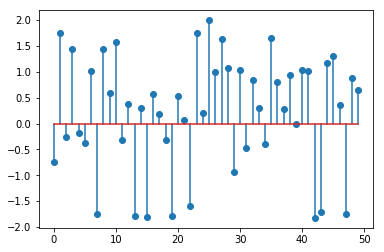

In [6]:
import matplotlib.pyplot as plt
plt.stem(vvs)
vvs

[1.5962391270765186,
 0.7596905798517473,
 0.446569807067696,
 0.6839748986766789,
 1.9796794148215875,
 1.4394623253147476,
 0.916581930792842,
 1.0159721525961007,
 0.03509970309135935,
 1.0279660065732978,
 0.8417713292294828,
 1.0039649959478978,
 0.4386806514299153,
 0.2084757762971805,
 1.069039387352636,
 1.0104106181618062,
 1.307693728100631,
 1.3280230191370277,
 0.573310560909039,
 1.5053058025905945,
 1.0378361729481458,
 0.7099920113267637,
 0.8830736713881044,
 1.8127418798712234,
 0.5929505379210325,
 1.8265548532151075,
 1.4067951921355826,
 0.1755796262867817,
 1.1921525862877949,
 0.18370504195984583,
 0.6157351311146437,
 1.1886642794433624,
 0.4202674012904719,
 1.3029913639449893,
 1.0808173301848927,
 0.1610369966322096,
 1.3258439609999604,
 0.6237995937881609,
 0.16434654146600924,
 0.6326006759636071,
 0.40396022499257866,
 0.9266241400082667,
 0.26828064487277836,
 0.1421050471144194,
 1.4200987955167579,
 0.6519347041656935,
 1.05543937698312,
 0.327269446502

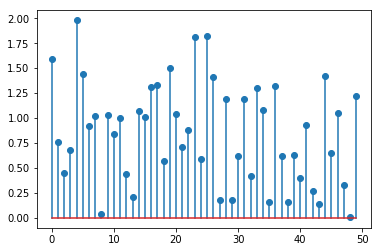

In [8]:
plt.stem(pvvs)
pvvs